In [191]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_df = pd.merge(study_results, mouse_metadata,
                                 how='inner', on='Mouse ID')
# Display the data table for preview
combined_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = combined_study_df["Mouse ID"].nunique()
print(mice_count)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


duplicate_mice = combined_study_df[combined_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

#Display unique mouse ids
duplicate_mouse_ids


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID.  Duplicate mouse ID is "g989" from above.
combined_study_df[combined_study_df['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_study_clean_df = combined_study_df[combined_study_df['Mouse ID'] != 'g989']
combined_study_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = combined_study_clean_df["Mouse ID"].nunique()
print(mice_count_clean)

248


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = combined_study_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_study_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_study_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = combined_study_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = combine# Assemble the resulting series into a single summary DataFrame.d_study_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({"Mean Tumor Volume":mean,
                                 "Median Tumor Volume":median,
                                "Tumor Volume Variance":variance,
                                "Tumor Volume Std. Dev.":std_dev,
                                "Tumor Volume Std. Err":SEM})
# Display summary DataFrame
summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = combined_study_clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

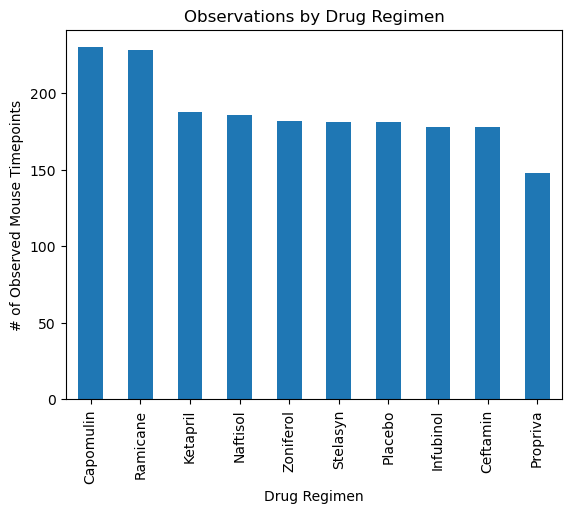

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_count = combined_study_clean_df["Drug Regimen"].value_counts()
mice_count.plot(kind = "bar")

# Set title and axis labels
plt.title("Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


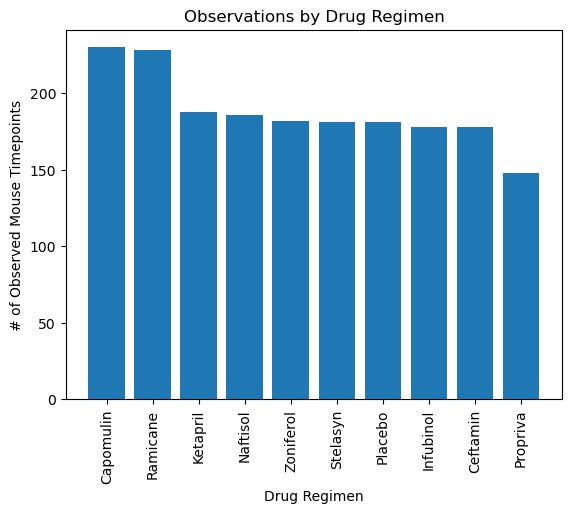

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mice_count.index.values,mice_count.values)

# Set title and axis labels, rotate axis labels
plt.title("Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

plt.show()

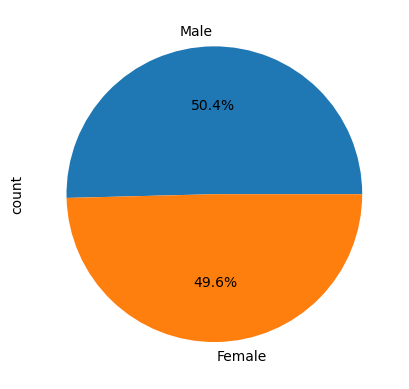

In [30]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender_df = combined_study_clean_df.loc[:,["Mouse ID", "Sex"]].drop_duplicates()
gender_counts = mice_gender_df.Sex.value_counts()

# Make the pie chart
gender_counts.plot(kind = "pie",autopct="%1.1f%%")
plt.show()

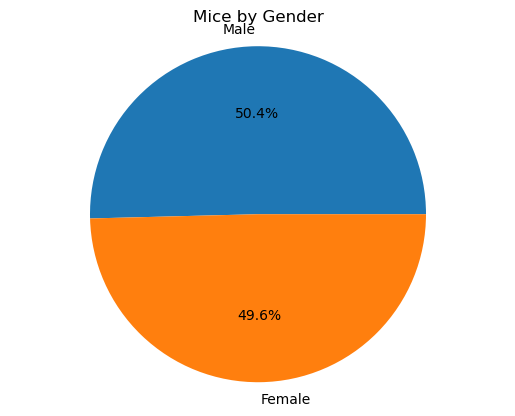

In [64]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
#plot(kind="pie"


# Get the unique mice with their gender
mice_gender_pyplot_df = combined_study_clean_df.loc[:,["Mouse ID", "Sex"]].drop_duplicates()
gender_counts_pyplot = mice_gender_pyplot_df.Sex.value_counts()

# Make the pie chart
plt.pie(gender_counts_pyplot,labels = gender_counts_pyplot.index,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Mice by Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [203]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_study_clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_merged = last_timepoint.merge(combined_study_clean_df,on = ["Mouse ID","Timepoint"], how="left")

#Filter merged df for Capomulin, Ramicane, Infubinol, and Ceftamin drug regimes
last_timepoint_merged = last_timepoint_merged.loc[(last_timepoint_merged["Drug Regimen"] == "Capomulin") | 
                                                  (last_timepoint_merged["Drug Regimen"] == "Ramicane") |
                                                  (last_timepoint_merged["Drug Regimen"] == "Infubinol") |
                                                  (last_timepoint_merged["Drug Regimen"] == "Ceftamin"),:]

#Display merged and filtered df
last_timepoint_merged


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [329]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = last_timepoint_merged.loc[last_timepoint_merged["Drug Regimen"] == treatment,"Tumor Volume (mm3)"].quantile([.25,.5,.75])
    
    # Calculate upper & lower quartiles, iqr and upper & lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # add subset
    final_tumor_volumes.append(last_timepoint_merged.loc[(last_timepoint_merged["Drug Regimen"] == treatment),
     ("Mouse ID","Tumor Volume (mm3)","Drug Regimen")])
    
    # Determine outliers using upper and lower bounds
    tumor_outliers = last_timepoint_merged.loc[(last_timepoint_merged["Drug Regimen"] == treatment) & 
    ((last_timepoint_merged['Tumor Volume (mm3)'] < lower_bound) | 
    (last_timepoint_merged['Tumor Volume (mm3)'] > upper_bound)),"Tumor Volume (mm3)"]
    print(f"{treatment}'s potential outliers: {tumor_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


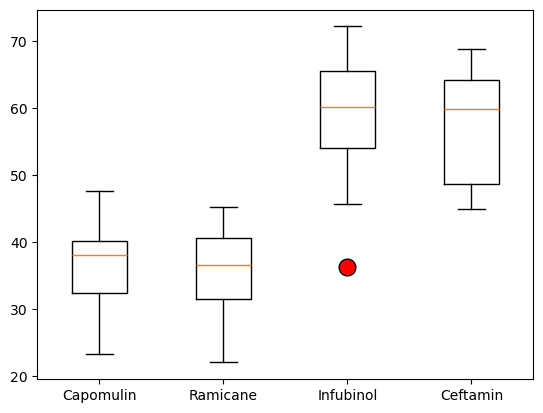

In [331]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

capomulin_volumes = last_timepoint_merged.loc[last_timepoint_merged["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"]
ramicane_volumes = last_timepoint_merged.loc[last_timepoint_merged["Drug Regimen"] == "Ramicane","Tumor Volume (mm3)"]
infubinol_volumes = last_timepoint_merged.loc[last_timepoint_merged["Drug Regimen"] == "Infubinol","Tumor Volume (mm3)"]
ceftamin_volumes = last_timepoint_merged.loc[last_timepoint_merged["Drug Regimen"] == "Ceftamin","Tumor Volume (mm3)"]

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')
plt.boxplot ([capomulin_volumes, ramicane_volumes, infubinol_volumes, ceftamin_volumes],flierprops = flierprops)
plt.xticks([1, 2, 3, 4], treatments)
plt.show()

## Line and Scatter Plots

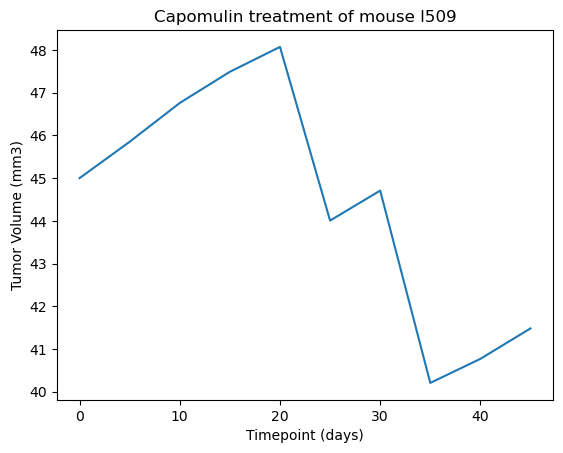

In [141]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_volume_line = combined_study_clean_df.loc[(combined_study_clean_df["Drug Regimen"] == "Capomulin") &
                                                (combined_study_clean_df["Mouse ID"] == "l509"), ["Timepoint", "Tumor Volume (mm3)"]]
# Set x and y axes
x_axis = tumor_volume_line["Timepoint"]
y_axis = tumor_volume_line["Tumor Volume (mm3)"]

#tumor_volume_line plot
plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


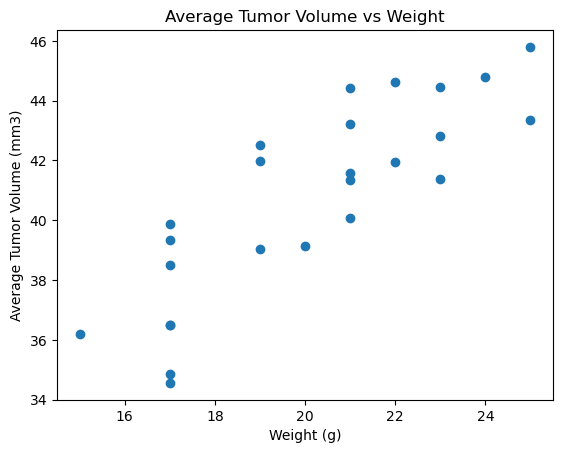

In [169]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter combined study data to only keep "Capomulin" drug regimen data
tumor_weight_scatter = combined_study_clean_df.loc[(combined_study_clean_df["Drug Regimen"] == "Capomulin"),
                                                    ["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

#Create series for the mouse weight and the average observed tumor volume
avg_tumor_vol = tumor_weight_scatter.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = tumor_weight_scatter.groupby("Mouse ID")["Weight (g)"].mean()

#Merge mouse weight and average observed tumor volume series.  Results in a df that shows weight and 
#average observed tumor volume for each Mouse ID.
tumor_weight_scatter_avg = pd.merge(mouse_weight, avg_tumor_vol,
                                 how='inner', on='Mouse ID')

#Create the scatter plot
plt.scatter(tumor_weight_scatter_avg["Weight (g)"],tumor_weight_scatter_avg["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


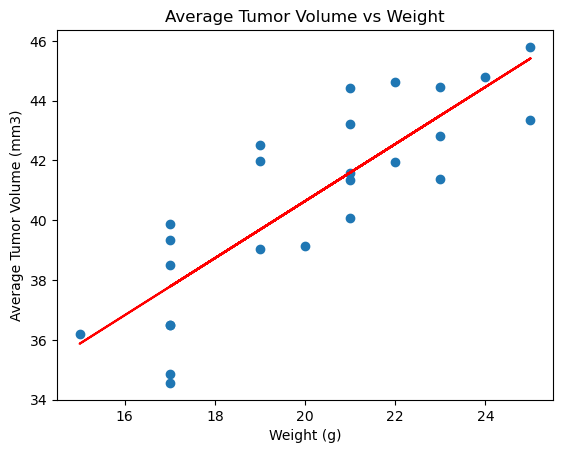

In [199]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Set variables for x and y values
x_values = tumor_weight_scatter_avg["Weight (g)"]
y_values = tumor_weight_scatter_avg["Tumor Volume (mm3)"]

# Calculate and print correlation coefficient between weight and average tumor volume
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Generate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot of the weight vs average tumor volume
plt.scatter(x_values,y_values)
plt.title("Average Tumor Volume vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Add linear regression line
plt.plot(x_values,regress_values,"r-")

# Show the plots
plt.show()

